## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any image into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

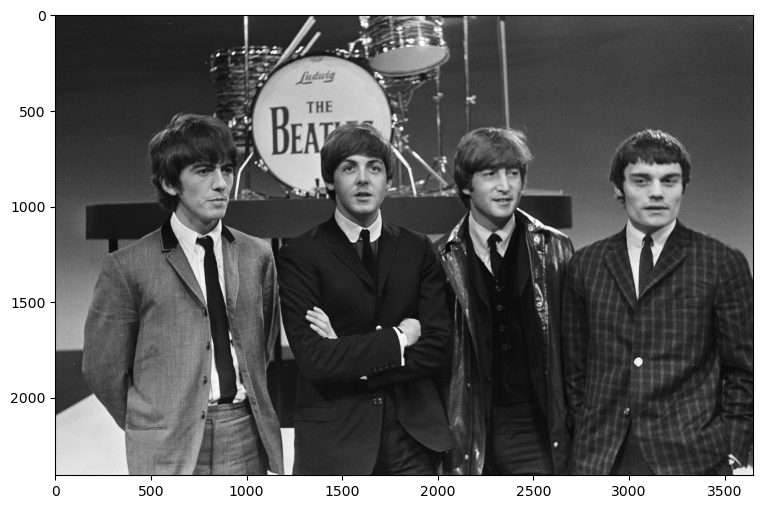

In [122]:
import cv2
# load in color image for face detection
image = cv2.imread('images/the_beatles.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


2948 711 400 400
1437 671 345 345
687 705 331 331
2164 722 331 331


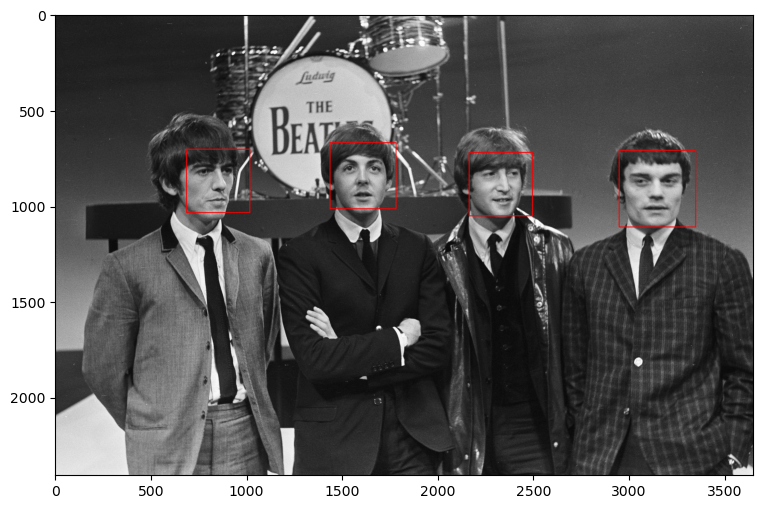

In [163]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.3, 5, minSize=(50, 50))

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [124]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('saved_models/model-c6ffc8c8567f4827b6ea8f30d1e74d99.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Last layer dimensions 3


/tmp/ipykernel_81/179937765.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('saved_models/model-c6ffc8c8567f4827b6ea8f30d1e74d99.pt'))


Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (norm1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (norm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (norm4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(5

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




In [182]:
def visualize_output(image, keypoints, scale):
    # un-transform the predicted key_pts data
    predicted_key_pts = keypoints[-1].data.numpy()
    # undo normalization of keypoints  
    x_start, y_start, x_offset, y_offset, scale_x, scale_y = scale
    predicted_key_pts[:, 0] = predicted_key_pts[:, 0] * scale_x + x_start + x_offset
    predicted_key_pts[:, 1] = predicted_key_pts[:, 1] * scale_y + y_start + y_offset
    
    show_all_keypoints(np.squeeze(image), predicted_key_pts)

    plt.show()

def show_all_keypoints(image, predicted_key_pts):
    """Show image with predicted keypoints"""
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')

Face at: [2948  711  400  400]
RIO at: (2898, 661, 250.0, 250.0, 2.232142857142857, 2.232142857142857)
Image shape: torch.Size([1, 1, 224, 224])
Keypoints shape torch.Size([1, 68, 2])
Keypoints unscaled from CNN (-51, -10, -52, 7)
Keypoints scaled to original image [-102  -20 -104   14]


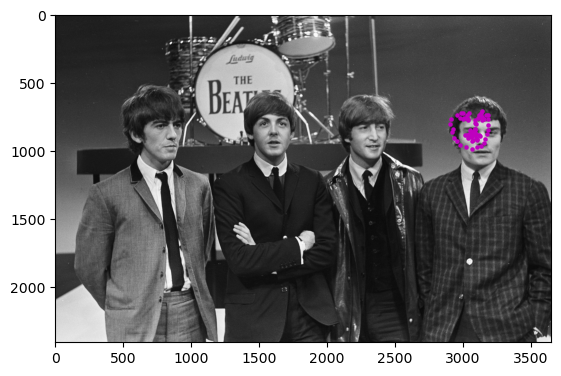

Face at: [1437  671  345  345]
RIO at: (1394, 628, 215.5, 215.5, 1.9241071428571428, 1.9241071428571428)
Image shape: torch.Size([1, 1, 224, 224])
Keypoints shape torch.Size([1, 68, 2])
Keypoints unscaled from CNN (-30, -10, -32, 4)
Keypoints scaled to original image [-30 -10 -32   4]


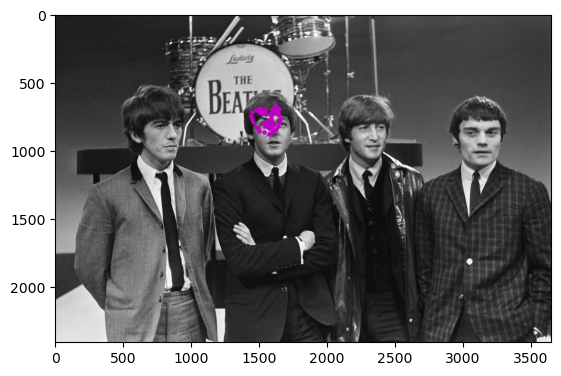

Face at: [687 705 331 331]
RIO at: (646, 664, 206.5, 206.5, 1.84375, 1.84375)
Image shape: torch.Size([1, 1, 224, 224])
Keypoints shape torch.Size([1, 68, 2])
Keypoints unscaled from CNN (-24, -12, -25, -2)
Keypoints scaled to original image [-24 -12 -25  -2]


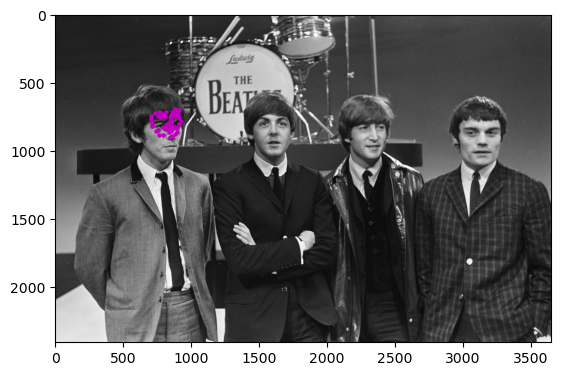

Face at: [2164  722  331  331]
RIO at: (2123, 681, 206.5, 206.5, 1.84375, 1.84375)
Image shape: torch.Size([1, 1, 224, 224])
Keypoints shape torch.Size([1, 68, 2])
Keypoints unscaled from CNN (-23, -8, -23, 4)
Keypoints scaled to original image [-23  -8 -23   4]


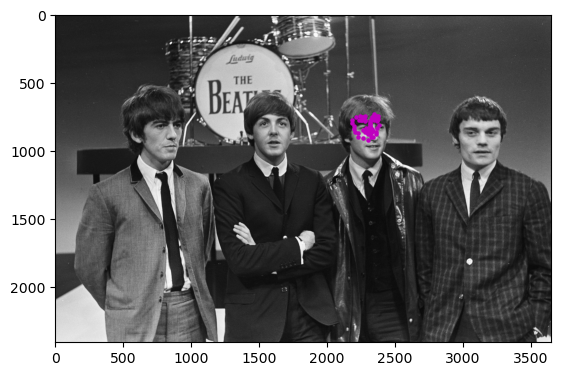

In [184]:
from data_load import normalize, rescale, to_tensor

def show_faces(image, faces):
    results = []
    
    image_copy = np.copy(image)
    
    # loop over the detected faces from your haar cascade
    for face in faces:
        (x,y,w,h) = face
        print('Face at:', face.astype(int))
        
        # Select the region of interest that is the face in the image 
        # If we start with (x,y,w,h) = (1437,671, 345, 345).
        # We want to broaden the image by 12.5% in both directions.
        # Meaning we calculate 345 * 1.25 x 345 * 1.25 = 431 x 431, which is an 431-345=86 pixel increase.
        # We subtract half of this from the original starting x,y.
        
        # This means our new (x,y,w,h) are:
        # (1437 - 86 * 0.5, 671 - 86 * 0.5, 431, 431)
        # (1394, 628, 431, 431)

        # Then we scale down the image to 224, 224 for the CNN to work.
        # Scaling from 431 -> 224, means multiplying by a factor of 224/431.
        # Or conversely, multiplying by 431/224 to undo the scaling.

        x_o = int(w / 8)
        y_o = int(h / 8)
        x_start = int(x - x_o)
        x_end = int(x + w + x_o)
        y_start = int(y - y_o)
        y_end = int(y + h + y_o)

        scale_x = (x_end - x_start) / 224
        scale_y = (y_end - y_start) / 224

        scale = (x_start, y_start, scale_x * 224/2, scale_y * 224/2, scale_x, scale_y)
        print('RIO at:', scale)

        roi = image_copy[y_start:y_end, x_start:x_end]

        ## Using the functions from data_load to make sure we perform the exact same operations.
        ## For that we just create a dummy object, as we don't want to refactor the classes from data_load.
        sample = {'image': roi, 'keypoints': [0,0]} 
        
        ## Convert the face region from RGB to grayscale
        ## Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
        sample = normalize(sample)
    
        ## Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
        sample = rescale(sample, 224)
    
        ## Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
        sample = to_tensor(sample)
    
        input_image = sample['image']
        input_image = input_image.unsqueeze(1).type(torch.FloatTensor)
        
        output_pts = net(input_image)
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)

        results.append(output_pts)

        print('Image shape:', input_image.shape)
        print('Keypoints shape', output_pts.shape)

        x_kpts = output_pts.detach().numpy()[:, 0]
        y_kpts = output_pts.detach().numpy()[:, 1]
        
        min_x = int(np.min(x_kpts))
        min_y = int(np.min(y_kpts))
        max_x = int(np.max(x_kpts))
        max_y = int(np.max(y_kpts))
        boundaries = np.array([
            min_x,
            max_x,
            min_y,
            max_y
        ]) * int(scale_x)

        print("Keypoints unscaled from CNN", (min_x, max_x, min_y, max_y))
        print("Keypoints scaled to original image", boundaries)
        
        visualize_output(image_copy, output_pts, scale)
    return results
            
results = show_faces(image, faces)